In [1]:
import os
import json
import random

from draco import Draco
from draco.data_utils import pairs_to_vec

from typing import DefaultDict, Dict, List, Any
from collections import defaultdict

import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

In [2]:
default_draco = Draco()

In [3]:
## if visualizations in ranked pairs hit a soft constraint, then mark as 1
## otherwise, mark as 0

json_files = [gpw_json for gpw_json in os.listdir('../draco2-training-datasets/') if gpw_json.endswith('json')]
num_files = len(json_files)

soft_coverage = {}

draco_softs = default_draco.soft_constraint_names

for i in range(0, num_files):
    json_file = json_files[i]
    
    fr = open('../draco2-training-datasets/' + json_file, 'r')
    fdata = json.load(fr)

    source = json_file.split('.')[0]
    
    soft_vec = {}
    for soft in draco_softs:
        soft_vec[soft] = 0
    
    for pair in fdata:
        
        pos_softs = default_draco.count_preferences(pair["positive"])
        neg_softs = default_draco.count_preferences(pair["negative"])
        
        for soft in pos_softs:
            soft_vec[soft] = 1
            
        for soft in neg_softs:
            soft_vec[soft] = 1
        
    soft_coverage[source] = soft_vec

In [4]:
## filter out soft constraints never covered by any work

soft_zeros = {}

for paper in soft_coverage:
    for soft in soft_coverage[paper]:
        if soft_coverage[paper][soft] == 0:
            if soft in soft_zeros:
                soft_zeros[soft] += 1
            else:
                soft_zeros[soft] = 1

paper_num = len(soft_coverage.keys())                
filtered_soft_coverage = {}

for paper in soft_coverage:
    filtered_soft_coverage[paper] = {}
    for soft in soft_coverage[paper]:
        if soft in soft_zeros and soft_zeros[soft] == paper_num:
            continue
        filtered_soft_coverage[paper][soft] = soft_coverage[paper][soft]
        
## save

with open("visualization-space-coverage.json", "w") as f:
    json.dump(filtered_soft_coverage, f, indent=4)

In [5]:
paper_arr = list(filtered_soft_coverage.keys())
paper_arr.reverse()
soft_arr = list(filtered_soft_coverage["Mackinlay1986automating(T)"].keys())

print (len(soft_arr))

heatmap_data = []

for paper in paper_arr:
    temp_arr = []
    for soft in soft_arr:
        temp_arr.append(filtered_soft_coverage[paper][soft])
    heatmap_data.append(temp_arr)

fig = ff.create_dendrogram(np.array(heatmap_data), orientation='right', labels=paper_arr, color_threshold=10)
fig.update_layout(width=400, height=870)
fig.show()

paper_order = fig['layout']['yaxis']['ticktext']
paper_order = list(paper_order)
paper_order.reverse()

print (paper_order)

98


['Panavas2022juvenile(E)', 'McColeman2021rethinking(E)', 'Cleveland1984graphical(T)', 'Araya2019comparison(E)', 'Kosara2019impact(E)', 'Heer2010crowdsourcing(E)', 'Cleveland1984graphical(E)', 'Hong2021weighted(E)', 'Nusrat2018evaluating(E)', 'Mylavarapu2019ranked(E)', 'Godau2016perception(E)', 'Waldner2019comparison(E)', 'Correll2020truncating(E)', 'Saket2018task(E)', 'Correll2012comparing(E)', 'Albers2014task(E)', 'Redmond2019visual(E)', 'Golebiowska2020rainbow(E)', 'Gramazio2014relation(E)', 'Gleicher2013perception(E)', 'Aigner2011bertin(E)', 'Javed2010graphical(E)', 'Correll2017regression(E)', 'Ryan2018glance(E)', 'Gogolou2018comparing(E)', 'Ondov2018face(E)', 'Jardine2019perceptual(E)', 'Chung2016how(E)', 'Mackinlay1986automating(T)', 'Kim2018assessing(E)']


/var/folders/kc/10tt758d1d19lddd9gwdr1rc0000gn/T/ipykernel_1564/2044108637.py:27: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



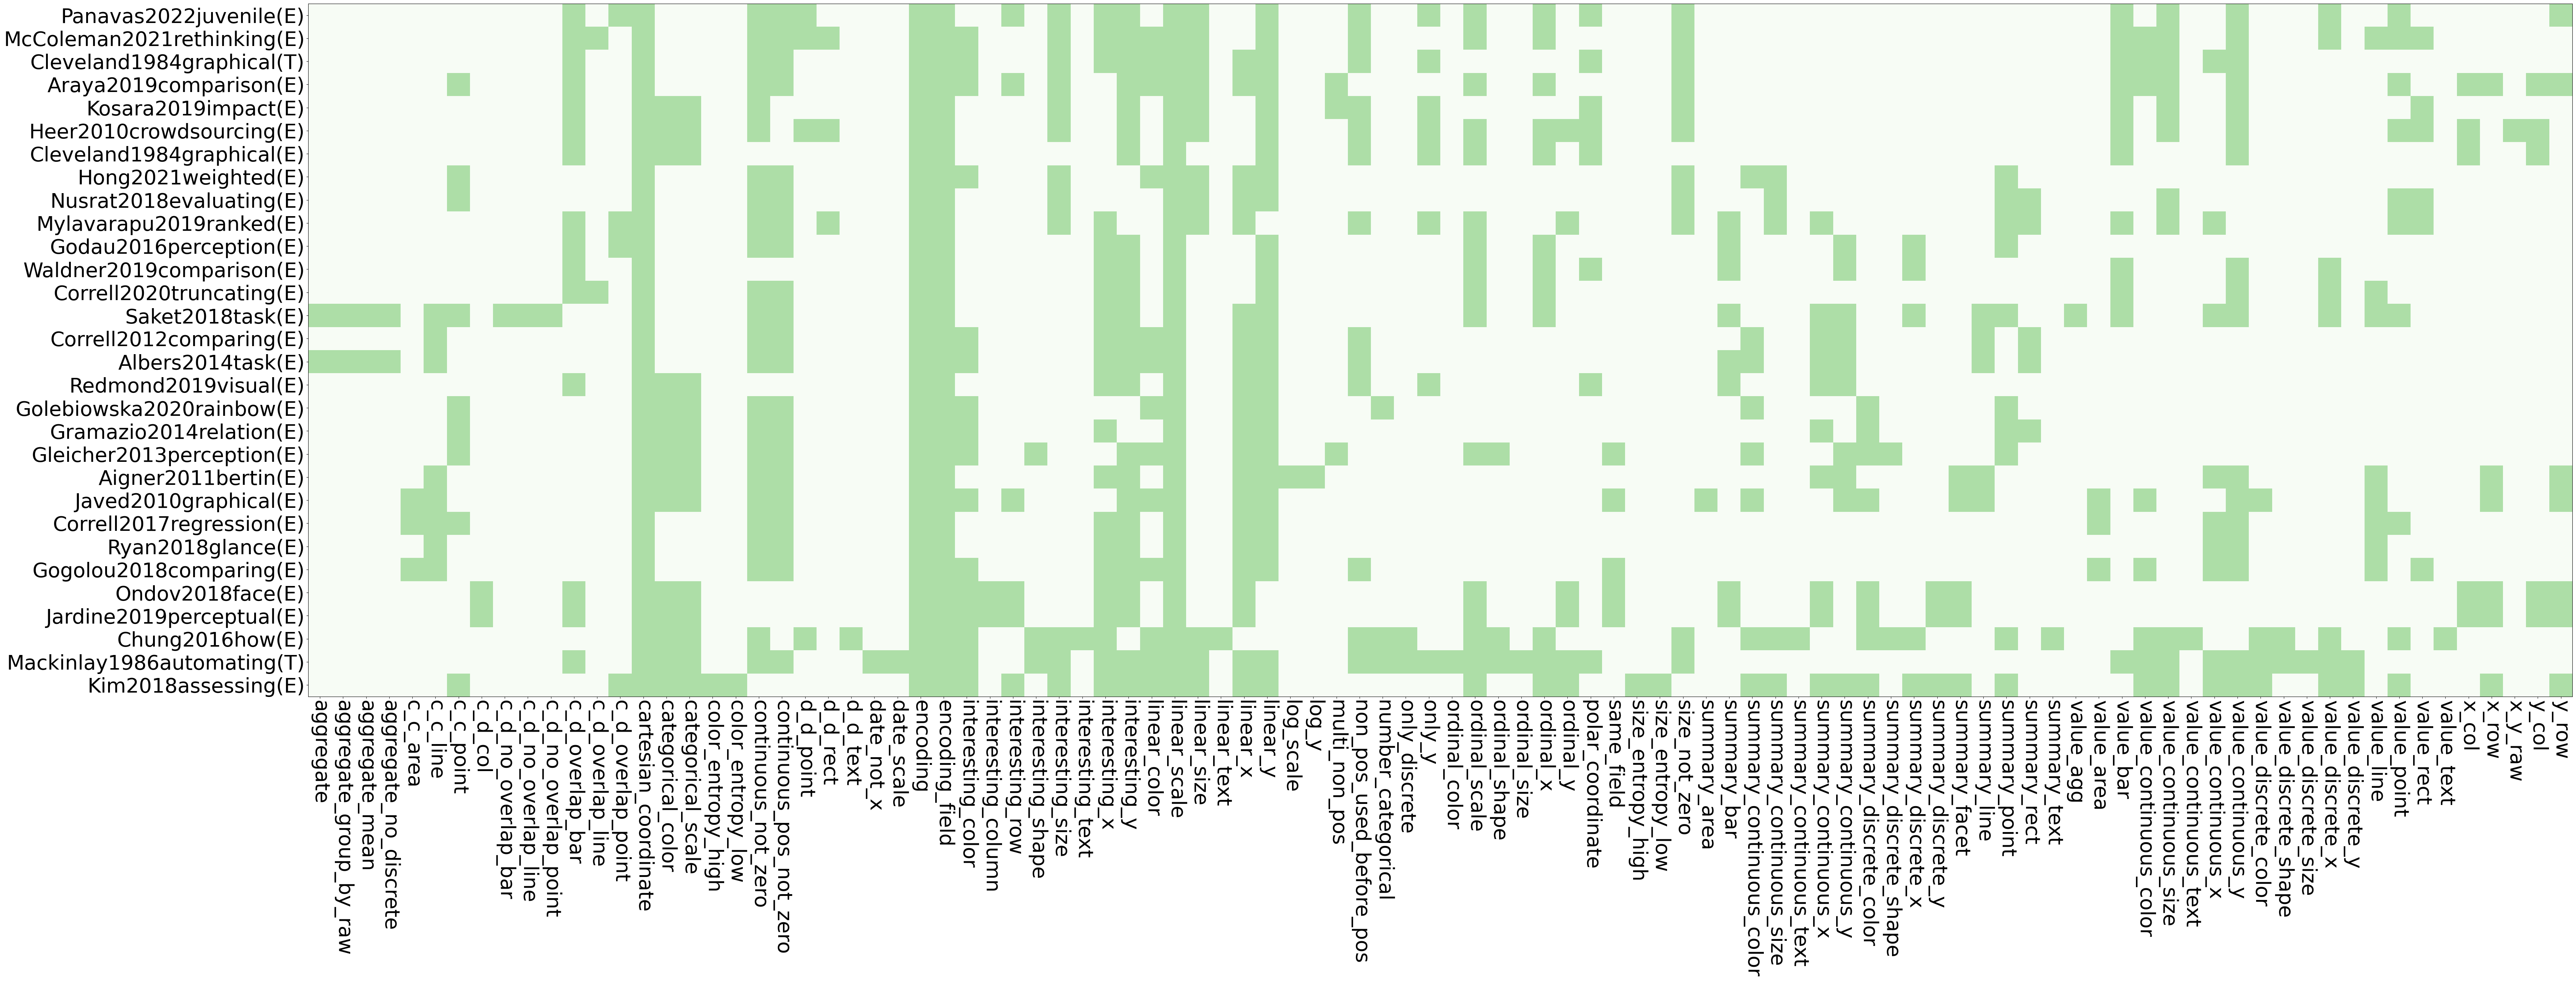

In [6]:
### cluster by paper

heatmap_school = []

for paper in paper_order:
    temp_arr = []
    for soft in soft_arr:
        temp_arr.append(filtered_soft_coverage[paper][soft])
    heatmap_school.append(temp_arr)


figg, ax = plt.subplots()
cax = ax.matshow(heatmap_school, norm=colors.Normalize(vmin=0, vmax=3), cmap=plt.cm.Greens)

x_positions = list(range(len(soft_arr)))
ax.xaxis.set_ticks(x_positions)
ax.xaxis.set_ticklabels(soft_arr)
plt.gca().xaxis.tick_bottom()
plt.xticks(rotation=270,fontsize=40)

y_positions = list(range(len(paper_order)))
ax.yaxis.set_ticks(y_positions)
ax.yaxis.set_ticklabels(paper_order)
plt.yticks(fontsize=40)

figg.set_size_inches(80, 60)
figg.show()